## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [3]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
# spam_data.head()
spam_data.describe()
# spam_data.info()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [4]:
#your code here
spam_data.columns

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all', u'word_freq_3d', u'word_freq_our', u'word_freq_over', u'word_freq_remove', u'word_freq_internet', u'word_freq_order', u'word_freq_mail', u'word_freq_receive', u'word_freq_will', u'word_freq_people', u'word_freq_report', u'word_freq_addresses', u'word_freq_free', u'word_freq_business', u'word_freq_email', u'word_freq_you', u'word_freq_credit', u'word_freq_your', u'word_freq_font', u'word_freq_000', u'word_freq_money', u'word_freq_hp', u'word_freq_hpl', u'word_freq_george', u'word_freq_650', u'word_freq_lab', u'word_freq_labs', u'word_freq_telnet', u'word_freq_857', u'word_freq_data', u'word_freq_415', u'word_freq_85', u'word_freq_technology', u'word_freq_1999', u'word_freq_parts', u'word_freq_pm', u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting', u'word_freq_original', u'word_freq_project', u'word_freq_re', u'word_freq_edu', u'word_freq_table', u'word_freq_conference', u'char_freq_;', u'char_freq_(', u'char_freq

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000180CF048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001C99A978>]], dtype=object)

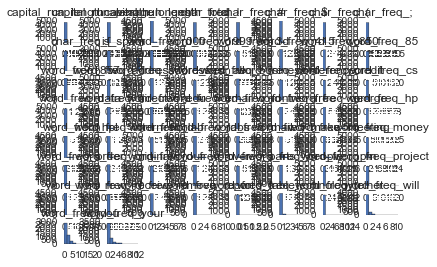

In [5]:
spam_data.hist()

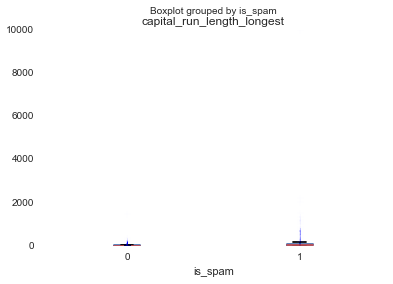

In [6]:
spam_data.boxplot(column = 'capital_run_length_longest', by = 'is_spam')

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [7]:
import statsmodels.formula.api as smf
from seaborn import plt
from itertools import product
formula = smf.ols('is_spam ~ capital_run_length_longest', spam_data).fit()
print formula.summary()

                            OLS Regression Results                            
Dep. Variable:                is_spam   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     225.3
Date:                Thu, 12 Mar 2015   Prob (F-statistic):           9.44e-50
Time:                        17:36:20   Log-Likelihood:                -3123.7
No. Observations:                4601   AIC:                             6251.
Df Residuals:                    4599   BIC:                             6264.
Df Model:                           1                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.3658      0.007     50.223      0.000         0.351     0.380
capi

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [8]:
features = spam_data.iloc[:,:-1]
target = spam_data["is_spam"]

In [9]:
from sklearn.cross_validation import train_test_split, cross_val_score 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=12)

In [10]:
y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [11]:
model = LogisticRegression()
model = model.fit(features, target)
model.score(features, target)

0.93240599869593566

In [12]:
pd.DataFrame(zip(features.columns, np.transpose(model.coef_)))

,0,1
0,word_freq_make,[-0.326577864992]
1,word_freq_address,[-0.153276466119]
2,word_freq_all,[0.13512307169]
3,word_freq_3d,[0.759538019213]
4,word_freq_our,[0.566122924471]
5,word_freq_over,[0.782635080408]
6,word_freq_remove,[2.18152786365]
7,word_freq_internet,[0.570167520634]
8,word_freq_order,[0.69659841703]
9,word_freq_mail,[0.120049069738]


In [13]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [14]:
model2.score(features, target)

0.92849380569441431

In [15]:
predicted = model2.predict(X_test)
print predicted

[1 0 0 ..., 1 1 0]


In [35]:
y_test

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [16]:
probs = model2.predict_proba(X_test)
print probs

[[  2.02638086e-05   9.99979736e-01]
 [  9.98000248e-01   1.99975160e-03]
 [  1.00000000e+00   2.60372801e-23]
 ..., 
 [  4.10624189e-03   9.95893758e-01]
 [  5.40314999e-03   9.94596850e-01]
 [  9.99939123e-01   6.08772678e-05]]


In [17]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.931933381608
0.968521112668


###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [18]:
#your code here
scores = cross_val_score(LogisticRegression(), features, target, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.93058568  0.92190889  0.9175705   0.94565217  0.9326087   0.93478261
  0.95434783  0.93913043  0.8496732   0.85620915]
0.918246916799


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [19]:
clf = neighbors.KNeighborsClassifier(5, weights='uniform')
scores = cross_val_score(clf, features, target, cv=5)
print scores

[ 0.74918567  0.78175896  0.81107492  0.80739935  0.71490751]


In [20]:
n_neighbors = range(1, 51, 2)
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

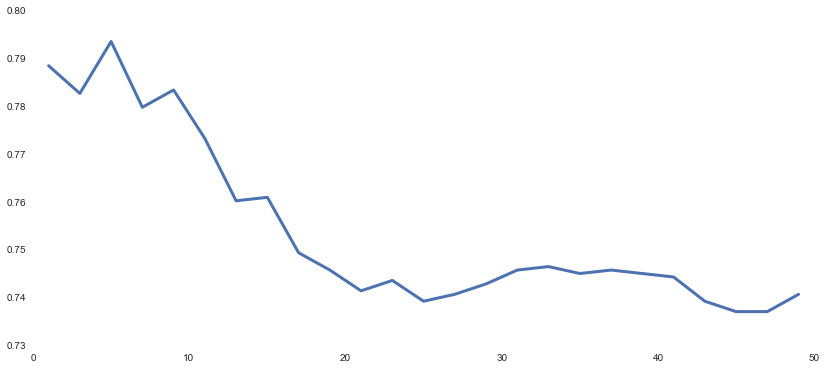

In [21]:
plt.figure(figsize=(14,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)

In [22]:
np.mean(scores)

0.75414916727009418

In [23]:
#your code here
clf3 = neighbors.KNeighborsClassifier(3)
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.78276611151339603

Regression is more accurate

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [24]:
len(feature_selection.f_classif(features, target)[0])

57

In [25]:
len(feature_selection.f_classif(features, target)[0])

57

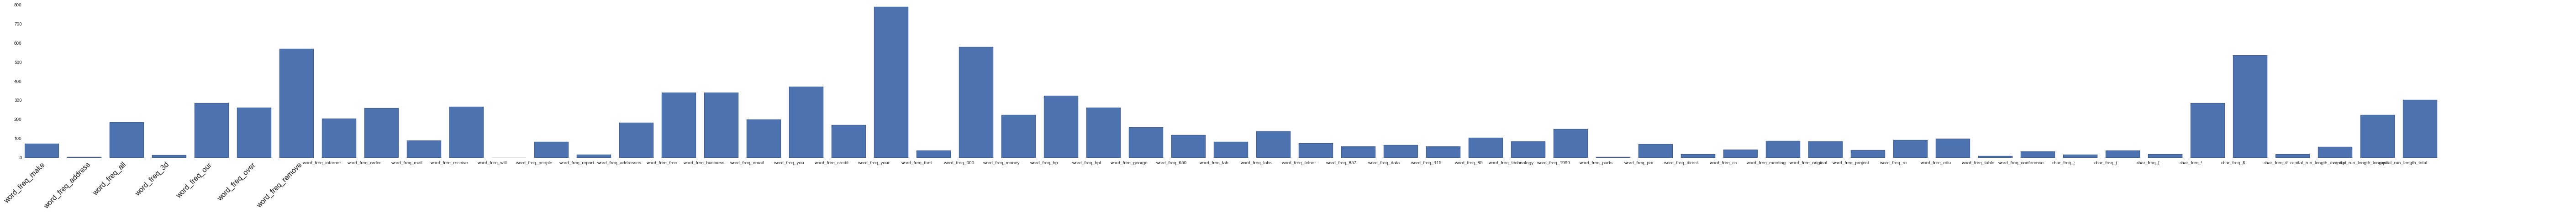

In [26]:
#your code heren = np.arange(len(features.columns))
n = np.arange(len(features.columns))

fig = plt.figure(figsize=(100,6))
ax = fig.add_subplot(111)

ax.bar(n, feature_selection.f_classif(features, target)[0])

xtickNames = ax.set_xticklabels(features.columns)
ax.set_xticks(n)
_ = plt.setp(xtickNames, rotation=45, fontsize=16)

In [27]:
logit = smf.Logit(target, features)
results=logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.212842
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4544
Method:                           MLE   Df Model:                           56
Date:                Thu, 12 Mar 2015   Pseudo R-squ.:                  0.6826
Time:                        17:37:02   Log-Likelihood:                -979.29
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
word_freq_make                -0.4925      0.204     -2.414      0.016        -0.892    -0.093
word_freq_address             -0.2455      0.066     -3.728      0.000        -0.375    -0.116
word_freq_all                 -0.0881      0.109     -0.811      0.417        -0.301     0.125
word_freq_3d                   2.0840      1.441      1.447      0.148        -0.739     4.908
word_freq_our                  0.3643      0.099      3.679      0.000         0.170     0.558
word_freq_over                 0.5346      0.240      2.229      0.026         0.064     1.005
word_freq_remove               2.1275      0.327      6.501      0.000         1.486     2.769
word_freq_internet             0.4187      0.144      2.901      0.004         0.136     0.702
word_freq_order                0.5012      0.270      1.860      0.063        -0.027     1.029
word_freq_mail                 0.0377      0.068      0.555      0.579        -0.095     0.171
word_freq_receive             -0.1094      0.291     -0.376      0.707        -0.680     0.461
word_freq_will                -0.3316      0.072     -4.615      0.000        -0.472    -0.191
word_freq_people              -0.3511      0.216     -1.627      0.104        -0.774     0.072
word_freq_report              -0.0540      0.135     -0.399      0.690        -0.319     0.211
word_freq_addresses            1.4374      0.750      1.916      0.055        -0.033     2.907
word_freq_free                 0.8798      0.143      6.149      0.000         0.599     1.160
word_freq_business             0.8914      0.225      3.956      0.000         0.450     1.333
word_freq_email               -0.0107      0.110     -0.097      0.923        -0.227     0.205
word_freq_you                 -0.0830      0.032     -2.612      0.009        -0.145    -0.021
word_freq_credit               1.1846      0.554      2.139      0.032         0.099     2.270
word_freq_your                 0.1524      0.051      2.986      0.003         0.052     0.252
word_freq_font                 0.1957      0.186      1.054      0.292        -0.168     0.560
word_freq_000                  2.1029      0.462      4.551      0.000         1.197     3.009
word_freq_money                0.4031      0.166      2.426      0.015         0.077     0.729
word_freq_hp                  -2.2495      0.319     -7.052      0.000        -2.875    -1.624
word_freq_hpl                 -1.1445      0.436     -2.626      0.009        -1.999    -0.290
word_freq_george              -8.8352      1.649     -5.358      0.000       -12.067    -5.603
word_freq_650                  0.4550      0.203      2.244      0.025         0.058     0.852
word_freq_lab                 -3.5130      1.722     -2.040      0.041        -6.888    -0.138
word_freq_labs                -0.4937      0.322     -1.534      0.125        -1.124     0.137
word_freq_telnet              -0.3485      0.654     -0.533      0.594        -1.631     0.934
word_freq_8

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [28]:
def plot_roc_curve(y_test, probs, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

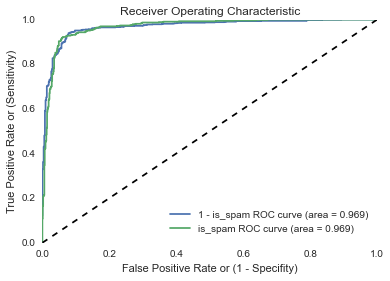

In [29]:
categories = [ '1 - is_spam', 'is_spam']

plot_roc_curve(y_test, probs, categories)

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [34]:
print y_test

[1 0 0 ..., 1 1 0]


In [32]:
probs[1]

array([ 0.99800025,  0.00199975])

In [42]:
results=[]
for i in range(len(probs)):
    if probs[i][0] > .5:
        results.append(1)
    else:
        results.append(0)
print results

float(np.sum([results])) / len(results)

[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 

0.6263577118030412

In [43]:
results2=[]
for i in range(len(probs)):
    if probs[i][0] > .8:
        results2.append(1)
    else:
        results2.append(0)
print results2

float(np.sum([results2])) / len(results2)

[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 

0.5249818971759594

In [41]:
#your code here

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [31]:
#your discussion here
#The pros and cons depend on how you change the threshold. 
#When we changed the the threshold from .5 to .8 less email was classified as spam.
#In this scenario the pro is that less "ham" emails will be classified as spam.
#The con is that more spam will go through with the ham emails.

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [11]:
#your code here

In [12]:
#your visualization here